In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#selected datasets that produced the highest silhouette scores

teledf = pd.read_csv('teledf.csv')
teledf_bins = pd.read_csv('teledf_bins.csv')
teledf_churn = pd.read_csv('teledf_churn.csv')
teledf_nochurn = pd.read_csv('teledf_nochurn.csv')

In [3]:
#pipeline for all data
#silhouette score: 0.533

X_all = teledf_bins.drop(columns=['State','Area code'])
scaler_all = MinMaxScaler()
pca_all = PCA(n_components=2)
db_all = DBSCAN(metric='cosine', min_samples=5, eps=0.2)

X_all_scaled = scaler_all.fit_transform(X_all)
X_all_pca = pca_all.fit_transform(X_all_scaled)
db_all.fit(X_all_pca)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [4]:
#pipeline for churned data only
#silhouette score: 0.515

X_churn = teledf_churn.drop(columns=['State','Area code'])
scaler_churn = MinMaxScaler()
pca_churn = PCA(n_components=3)
db_churn = DBSCAN(metric='cosine', min_samples=5, eps=0.1)

X_churn_scaled = scaler_churn.fit_transform(X_churn)
X_churn_pca = pca_churn.fit_transform(X_churn_scaled)
db_churn.fit(X_churn_pca)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [5]:
#pipeline for unchurned data only
#silhouette score: 0.595

X_nochurn = teledf_nochurn.drop(columns=['State','Area code'])
scaler_nochurn = MinMaxScaler()
pca_nochurn = PCA(n_components=2)
db_nochurn = DBSCAN(metric='cosine', min_samples=7, eps=0.3)

X_nochurn_scaled = scaler_nochurn.fit_transform(X_nochurn)
X_nochurn_pca = pca_nochurn.fit_transform(X_nochurn_scaled)
db_nochurn.fit(X_nochurn_pca)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [6]:
teledf_bins['labels'] = db_all.labels_
teledf_bins.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl calls,Customer service calls,Churn,Bin_Total day minutes,Bin_Total day calls,...,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Total calls,Bin_Total charge,Bin_Account length,labels
0,KS,415,0,1,25,3,1,0,8,7,...,6,5,6,5,5,8,5,8,6,0
1,OH,415,0,1,26,3,1,0,5,8,...,7,5,7,7,7,6,7,5,5,0
2,NJ,415,0,0,0,5,0,0,7,7,...,4,5,4,7,7,5,7,6,6,1
3,OH,408,1,0,0,7,2,0,9,5,...,5,4,5,4,4,5,3,6,4,1
4,OK,415,1,0,0,3,3,0,5,7,...,5,7,5,6,6,4,8,4,4,1


In [15]:
teledf['labels'] = db_all.labels_

In [7]:
teledf_churn['labels'] = db_churn.labels_
teledf_churn.sample(10)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl calls,Customer service calls,Churn,Bin_Total day minutes,Bin_Total day calls,...,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Total calls,Bin_Total charge,Bin_Account length,labels
126,TN,510,0,1,31,1,6,1,5,7,...,6,5,6,5,5,5,4,5,1,2
142,DE,415,1,1,35,4,0,1,6,4,...,6,6,6,9,9,6,5,6,3,1
414,WV,510,1,0,0,6,1,1,8,6,...,4,7,4,8,8,7,6,7,5,3
132,WA,408,0,0,0,7,0,1,9,8,...,6,8,6,8,8,8,9,9,3,0
305,MI,408,0,0,0,3,1,1,9,7,...,5,4,5,5,5,8,6,8,6,0
415,UT,510,0,1,36,5,6,1,3,6,...,4,4,4,6,6,3,5,3,5,2
188,PA,408,0,0,0,1,2,1,9,7,...,6,4,6,7,7,7,5,8,5,0
315,MN,510,0,0,0,3,5,1,6,7,...,4,6,4,5,5,5,6,5,2,0
58,NC,408,1,1,32,4,2,1,7,9,...,4,6,4,8,8,7,7,7,6,1
103,NE,415,0,0,0,5,1,1,6,7,...,6,6,6,6,6,7,8,6,7,0


In [8]:
teledf_nochurn['labels'] = db_nochurn.labels_
teledf_nochurn.sample(10)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl calls,Customer service calls,Churn,Bin_Total day minutes,Bin_Total day calls,...,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Total calls,Bin_Total charge,Bin_Account length,labels
2823,KY,415,0,0,0,5,2,0,7,9,...,3,6,3,6,6,5,7,6,4,1
1195,VA,415,0,1,23,5,4,0,5,7,...,5,4,5,5,5,6,3,5,5,0
274,OR,415,1,0,0,4,0,0,6,6,...,7,5,7,3,3,5,4,5,7,1
1623,ND,415,0,0,0,4,1,0,4,7,...,4,7,4,6,6,4,7,4,5,1
1320,NJ,415,0,0,0,6,2,0,6,7,...,7,5,7,5,5,7,8,6,4,1
410,TX,408,1,0,0,4,1,0,7,6,...,6,9,6,5,5,7,9,7,4,1
908,NH,415,0,0,0,2,2,0,8,7,...,4,3,4,6,6,4,5,6,6,1
1837,NY,415,0,0,0,9,0,0,6,8,...,7,7,7,5,5,6,7,5,5,1
494,AZ,415,0,0,0,6,1,0,7,8,...,5,4,5,4,4,6,5,6,3,1
1418,LA,415,0,0,0,3,1,0,6,7,...,4,5,4,7,7,4,5,5,4,1


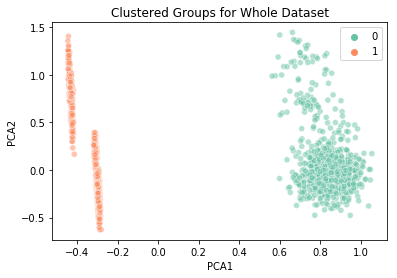

In [9]:
sns.scatterplot(X_all_pca[:,0], X_all_pca[:,1], 
                    data = teledf_bins, hue = db_all.labels_, alpha = 0.5, palette='Set2')

plt.title('Clustered Groups for Whole Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

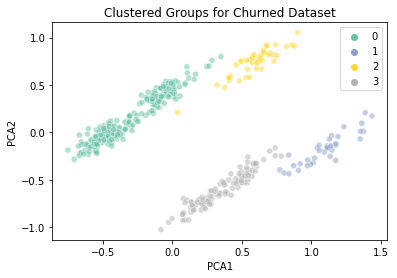

In [10]:
sns.scatterplot(X_churn_pca[:,0], X_churn_pca[:,1], 
                    data = teledf, hue = db_churn.labels_, alpha = 0.5, palette='Set2')

plt.title('Clustered Groups for Churned Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

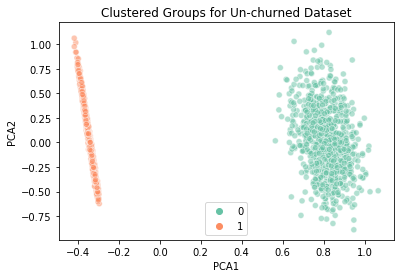

In [11]:
sns.scatterplot(X_nochurn_pca[:,0], X_nochurn_pca[:,1], 
                    data = teledf_nochurn, hue = db_nochurn.labels_, alpha = 0.5, palette='Set2')

plt.title('Clustered Groups for Un-churned Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [20]:
teledf_bins.corr()['labels'].sort_values().abs()

Voice mail plan            1.000000
Number vmail messages      0.956927
Bin_Total eve minutes      0.024669
Bin_Total eve charge       0.024257
Bin_Total minutes          0.017818
Bin_Total night calls      0.010163
Total intl calls           0.007618
Bin_Total night charge     0.006999
Bin_Total night minutes    0.006351
International plan         0.006006
Bin_Total charge           0.002147
Bin_Total day charge       0.001852
Bin_Total day minutes      0.001452
Area code                  0.000747
Bin_Total intl minutes     0.001419
Bin_Total intl charge      0.001419
Bin_Account length         0.001460
Bin_Total calls            0.004508
Bin_Total eve calls        0.010465
Bin_Total day calls        0.014631
Customer service calls     0.017824
Churn                      0.102148
labels                     1.000000
Name: labels, dtype: float64

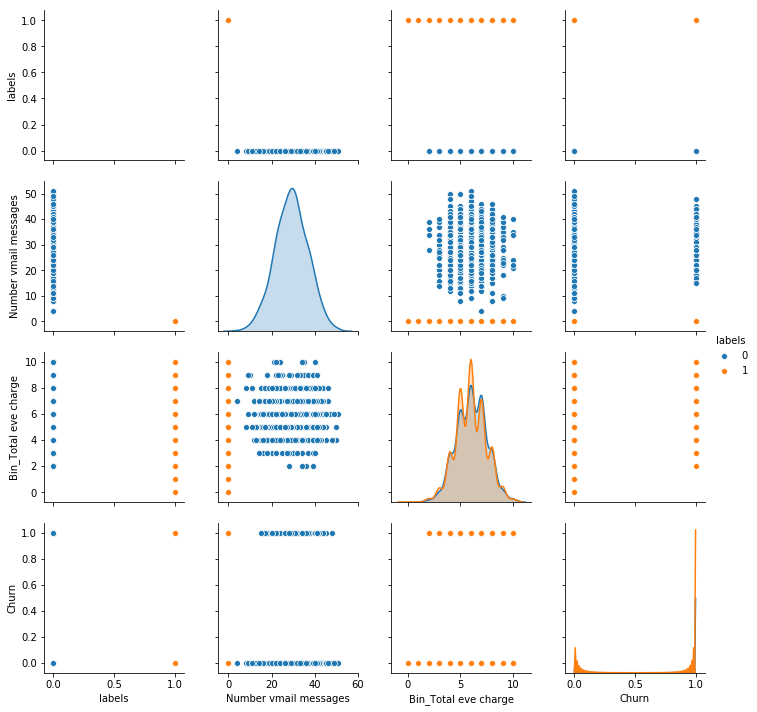

In [31]:
sns.pairplot(teledf_bins[['labels','Number vmail messages','Bin_Total eve charge', 'Churn']], hue = 'labels')

Text(0, 0.5, 'Total Evening Charge (bucket)')

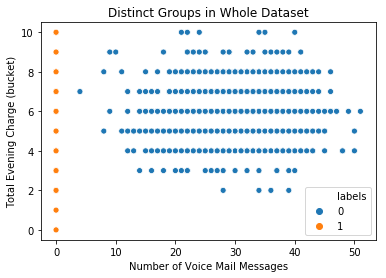

In [46]:
sns.scatterplot(data=teledf_bins, x='Number vmail messages', y='Bin_Total eve charge', hue='labels')
plt.title('Distinct Groups in Whole Dataset')
plt.xlabel('Number of Voice Mail Messages')
plt.ylabel('Total Evening Charge (bucket)')

In [22]:
teledf_churn.corr()['labels'].sort_values().abs()

Bin_Total charge           0.222143
Bin_Total minutes          0.215081
Bin_Total day minutes      0.201646
Bin_Total day charge       0.201646
Bin_Total night minutes    0.124158
Bin_Total night charge     0.124158
Customer service calls     0.113688
Total intl calls           0.086313
Bin_Total day calls        0.084247
Bin_Total eve minutes      0.083742
Bin_Total eve charge       0.083742
Bin_Total calls            0.046585
Bin_Total eve calls        0.042791
Bin_Account length         0.009471
Bin_Total night calls      0.031208
Area code                  0.084467
Bin_Total intl charge      0.160271
Bin_Total intl minutes     0.160271
Number vmail messages      0.237536
Voice mail plan            0.239144
International plan         0.806600
labels                     1.000000
Churn                           NaN
Name: labels, dtype: float64

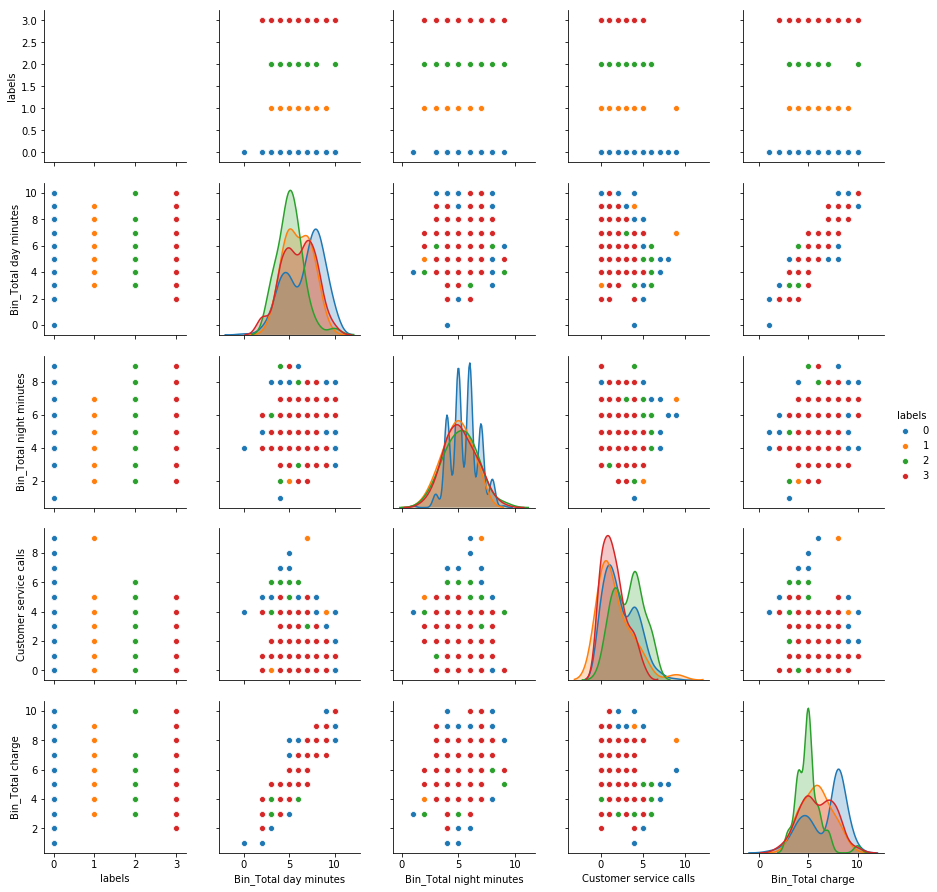

In [26]:
sns.pairplot(teledf_churn[['labels','Bin_Total day minutes','Bin_Total night minutes', 

                           'Customer service calls','Bin_Total charge']], hue = 'labels')

Text(6.799999999999997, 0.5, 'Proportion of Total')

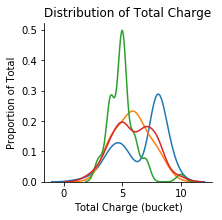

In [40]:

g = sns.FacetGrid(teledf_churn, hue="labels")
g = g.map(sns.kdeplot, "Bin_Total charge")

plt.title('Distribution of Total Charge')
plt.xlabel('Total Charge (bucket)')
plt.ylabel('Proportion of Total')

Text(0.42499999999999716, 0.5, 'Proportion of Total')

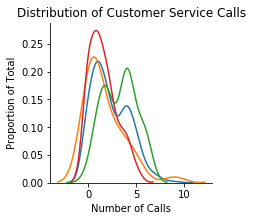

In [41]:

g = sns.FacetGrid(teledf_churn, hue="labels")
g = g.map(sns.kdeplot, "Customer service calls")

plt.title('Distribution of Customer Service Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Proportion of Total')

In [42]:
teledf_nochurn.corr()['labels'].sort_values().abs()

Voice mail plan            1.000000
Number vmail messages      0.955226
Bin_Total minutes          0.084257
Bin_Total charge           0.079433
Bin_Total day charge       0.064919
Bin_Total day minutes      0.064353
Bin_Total eve minutes      0.051392
Bin_Total eve charge       0.050857
Bin_Total night charge     0.025376
Bin_Total night minutes    0.024697
Bin_Total night calls      0.007251
International plan         0.003265
Bin_Account length         0.001847
Bin_Total intl charge      0.004650
Bin_Total intl minutes     0.004650
Area code                  0.005599
Bin_Total calls            0.007049
Bin_Total eve calls        0.009138
Total intl calls           0.009378
Bin_Total day calls        0.013382
Customer service calls     0.014376
labels                     1.000000
Churn                           NaN
Name: labels, dtype: float64

Text(0, 0.5, 'Total Evening Charge (bucket)')

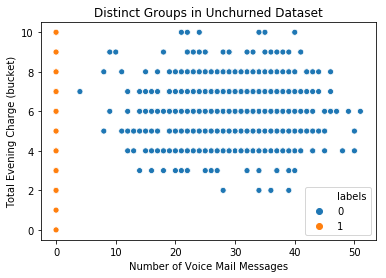

In [45]:
sns.scatterplot(data=teledf_nochurn, x='Number vmail messages', y='Bin_Total eve charge', hue='labels')
plt.title('Distinct Groups in Unchurned Dataset')
plt.xlabel('Number of Voice Mail Messages')
plt.ylabel('Total Evening Charge (bucket)')

In [47]:
teledf_nochurn.shape

(2850, 24)